# Unsupervised Learning

* İlgilendiğimiz problemde bağımlı değişken yok ise "Gözetimsiz (unsupervised) Öğrenme" problemidir. 

>> 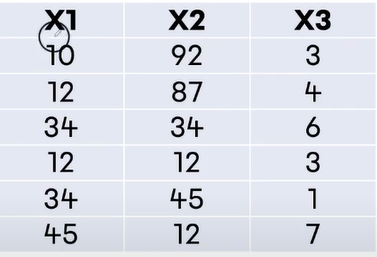 

Bazı Unsepervised Learning Algoritmaları;
* K-Ortalamalar (K-Means) 
* Hiyerarşik Kümeleme Analizi (Hierarchical Cluster Analysis) 
* Temel Bileşen Analizi (Principal Component Analysis -PCA- )

## K-Means

* Amaç gözlemleri birbirine olan benzerliklerine göre kümelere ayırmaktır. 

>> 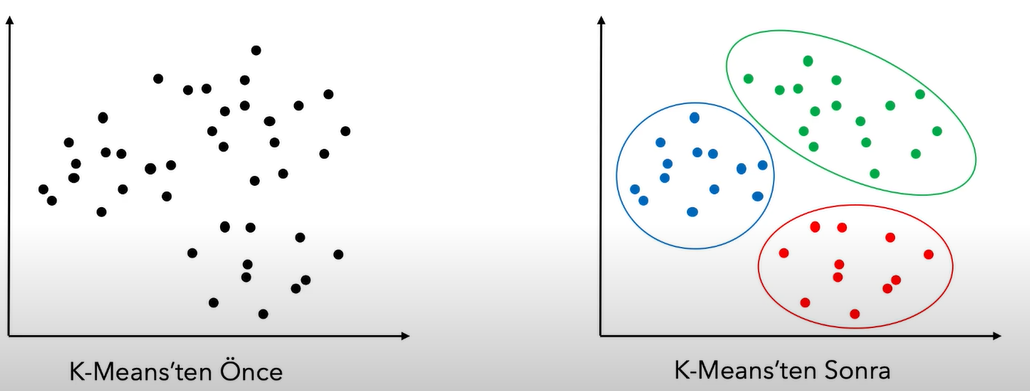

* **Adım 1:** Küme sayısı belirlenir. 
* **Adım 2:** Rastgele k merkez seçilir. 
* **Adım 3:** Her gözlem için k merkezlere uzaklıklar hesaplanır. 
* **Adım 4:** Her gözlem en yakın olduğu merkeze yani kümeye atanır. 
* **Adım 5:** Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.  
* **Adım 6:** Bu işlem belirlenen iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının toplamının (total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir. (SSE1 + SSE2 ...)  


### Uygulama

In [ ]:
# pip install yellowbrick

In [75]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action="ignore", category=Warning)

In [53]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [24]:
# Eksik değer var mı?
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [27]:
# Uzaklık temelli uygulamalarda Standartlaştırma önemli.

sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)
df[:10]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618]])

In [28]:
# Modelleme 
kmeans = KMeans(n_clusters=4, random_state=17).fit(df) # Dikkat! Bağımlı değişkenimiz yok.
kmeans.get_params() # Modelin sahip olduğu parametreler

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [29]:
print(f"Küme sayısı : {kmeans.n_clusters}")
print("-*"*10)
print(f"Kümelerin Merkezleri :\n {kmeans.cluster_centers_}")
print("-*"*10)
print(f"Kümeler: \n {kmeans.labels_}") # 0'dan 3'e kadar 4 küme var. 
print("-*"*10)
print(f"SSE: {kmeans.inertia_}") # En yakın cluster'a olan uzaklıkların toplamı

Küme sayısı : 4
-*-*-*-*-*-*-*-*-*-*
Kümelerin Merkezleri :
 [[0.1686747  0.11485774 0.34028683 0.12601868]
 [0.6124498  0.75       0.75423729 0.67980189]
 [0.30439405 0.32937147 0.70588235 0.31098951]
 [0.79141566 0.6802226  0.36864407 0.36466408]]
-*-*-*-*-*-*-*-*-*-*
Kümeler: 
 [3 1 1 3 1 1 2 2 1 3 2 0 1 2 0 2 0 3 0 1 2 1 0 3 2 0 0 1 0 2 1 1 3 0 2 2 2
 2 2 3 0 3 1 2 0 2 2 0 0 2]
-*-*-*-*-*-*-*-*-*-*
SSE: 3.6834561535859134


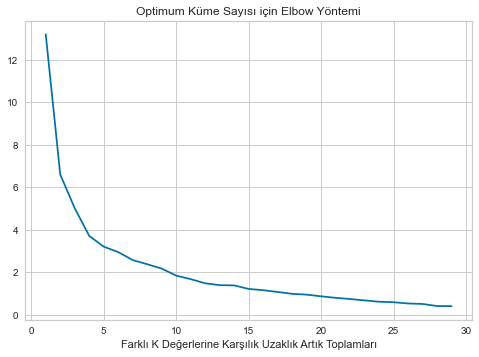

In [30]:
# Optimum Küme Sayısını Belirleme

kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme Sayısı için Elbow Yöntemi")
plt.show()

# Bu Elbow yöntemine göre cluster sayımızı 5 seçebilirdik. Dirseklenmenin olduğu nokta

* **NOT:**  
> Sadece elbow yöntemine bakılarak karar verilmemeli. Bu yöntem bize sadece bir fikir vermeli. Gerçek hayatta KMeans algoritmasını iş bilgisiyle birleştirerek kendimize göre modifiye etmeliyiz.

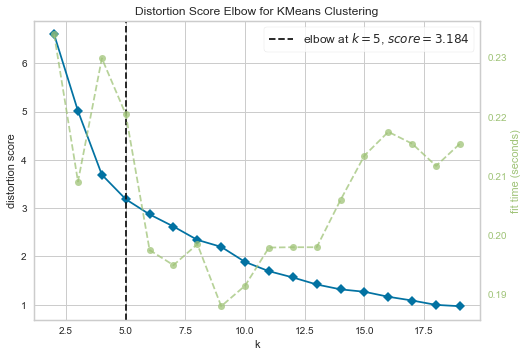

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Elbow yönteminin optimize edilmiş hali

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [36]:
# Bulduğumuz optimum cluster sayısı
elbow.elbow_value_

5

In [54]:
# Final Modeli
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

print(f"Küme sayısı : {kmeans.n_clusters}")
print("-*"*10)
print(f"Kümelerin Merkezleri :\n {kmeans.cluster_centers_}")
print("-*"*10)
print(f"Kümeler: \n {kmeans.labels_}") # Bulduğumuz optimum cluster sayısı 5. Bu yüzden 5 label olacaktır.


Küme sayısı : 5
-*-*-*-*-*-*-*-*-*-*
Kümelerin Merkezleri :
 [[  5.59       112.4         65.6         17.27      ]
 [ 11.76666667 257.91666667  68.41666667  28.93333333]
 [  8.21428571 173.28571429  70.64285714  22.84285714]
 [  2.95        62.7         53.9         11.51      ]
 [ 11.95       316.5         68.          26.7       ]]
-*-*-*-*-*-*-*-*-*-*
Kümeler: 
 [1 1 4 2 1 2 0 1 4 2 3 0 1 0 3 0 0 1 3 4 2 1 3 1 2 0 0 1 3 2 1 1 4 3 0 2 2
 0 2 1 3 2 2 0 3 2 2 3 3 2]


In [55]:
clusters_kmeans = kmeans.labels_ 

In [39]:
# Bulduğumuz labelların karşılığı görmek için DF'mize ekliyoruz

clusters_kmeans = kmeans.labels_ 
df = pd.read_csv("datasets/USArrests.csv", index_col = 0)
df["cluster"] = clusters_kmeans + 1 # 0 temsilcisi yerine 1'den başlasın
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


In [41]:
# Kümeleme işlemi sonrası oluşan kümeleri değerlendiriyoruz.
df.groupby("cluster").agg(["count", "mean", "median"])

# Oluşan kümeler üzerinde konuşarak belki bazı kümeleri bir araya getirebiliriz.

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1           12   6.975000    6.7      12  148.416667  153.5       12   
2           12  10.966667   11.2      12  264.000000  259.0       12   
3           10   2.680000    2.4      10   70.100000   64.5       10   
4            7  14.671429   14.4       7  251.285714  249.0        7   
5            9   4.955556    4.4       9  125.444444  120.0        9   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        62.333333   64.0    12  19.775000  18.75  
2        76.500000   80.0    12  33.608333  32.00  
3        51.000000   52.5    10  10.910000  11.00  
4        54.285714   58.0     7  21.685714  22.20  
5        80.111111   80.0     9  17.788889  18.80

## Hiyerarşik Kümeleme Analizi

* Amaç gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır. 

>> 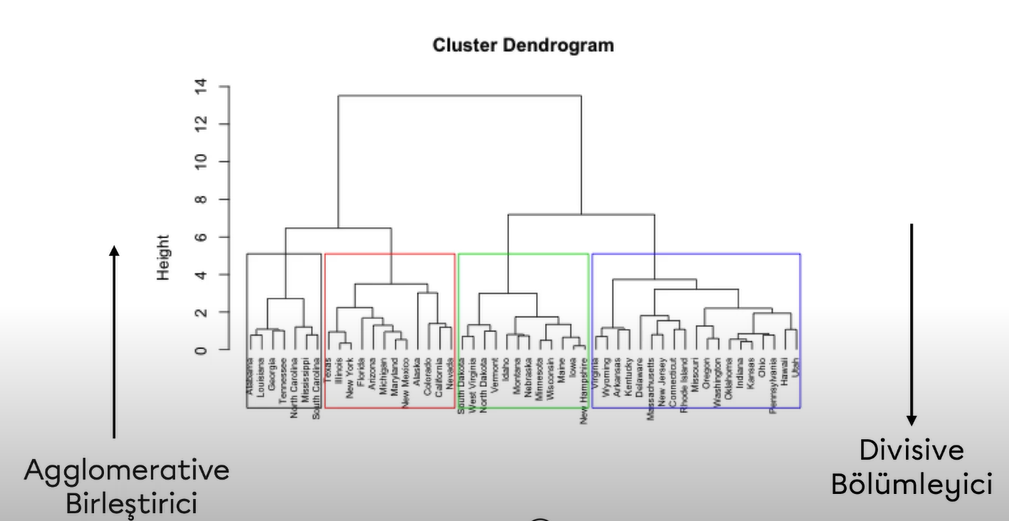

### Uygulama

In [42]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [43]:
# Uzaklık temelli uygulamalarda Standartlaştırma önemli.

sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)
df[:10]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618]])

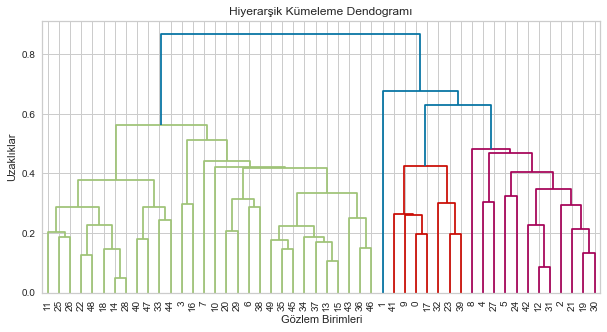

In [45]:
# Dendogram oluşturma

hc_average = linkage(df, "average")
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average, leaf_font_size=10)
plt.show()

# Burada inceleme yaparak kaç küme istiyorsak ona göre bölme yapabiliriz.

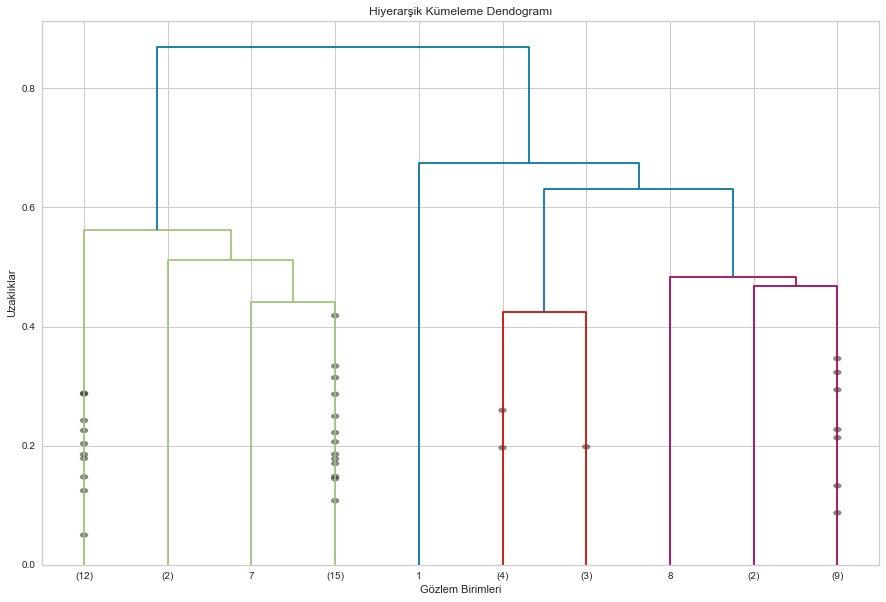

In [47]:
# Gözlem birimlerini topluluaştırarak daha okunaklı hale getiriyoruz.
hc_average = linkage(df, "average")
plt.figure(figsize=(15, 10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)
plt.show()

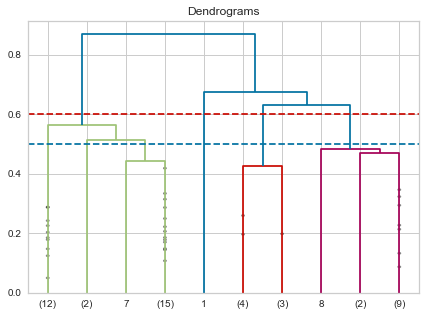

In [50]:
# Küme Sayısını Belirleme

plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)
plt.axhline(y=0.6, color="r", linestyle="--") # y ekseninde 0.6 noktasına çizgi at.
plt.axhline(y=0.5, color="b", linestyle="--") # y ekseninde 0.5 noktasına çizgi at.
plt.show()

# Örneğin y=0.6 noktasına çizgi çekersek 4 farklı küme belirlemiş oluruz.
# Örneğin y=0.5 noktasına çizgi çekersek 6 farklı küme belirlemiş oluruz.

In [51]:
# Final Modeli  Oluşturmak

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage="average") # 5 Küme olacağına karar verdik.

clusters = cluster.fit_predict(df) # Modeli fit et ve ardından predict et.
clusters # Elde ettiğimiz 5 küme

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [56]:
# Bulduğumuz kümeleri df'ye ekleyelim.

df = pd.read_csv("datasets/USArrests.csv", index_col=0)
df["hi_cluster_no"] = clusters + 1
df["kmeans_cluster_no"] = clusters_kmeans + 1 # KMeans ile tahminlediğimiz kümeleri de ekleyelim.
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,4,2
Alaska,10.0,263,48,44.5,3,2
Arizona,8.1,294,80,31.0,2,5
Arkansas,8.8,190,50,19.5,1,3
California,9.0,276,91,40.6,2,2


* KMeans ve Hiyerarşik Kümeleme sonucunda oluşan kümelerde farklılıklar görülebiliyor.

In [57]:
filter1 = (df.kmeans_cluster_no == 1) & (df.hi_cluster_no == 1)
df[filter1]

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Connecticut,3.3,110,77,11.1,1,1
Indiana,7.2,113,65,21.0,1,1
Kansas,6.0,115,66,18.0,1,1
Kentucky,9.7,109,52,16.3,1,1
Ohio,7.3,120,75,21.4,1,1
Pennsylvania,6.3,106,72,14.9,1,1
Utah,3.2,120,80,22.9,1,1


In [58]:
df[df.kmeans_cluster_no == 1]

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Connecticut,3.3,110,77,11.1,1,1
Idaho,2.6,120,54,14.2,5,1
Indiana,7.2,113,65,21.0,1,1
Kansas,6.0,115,66,18.0,1,1
Kentucky,9.7,109,52,16.3,1,1
Montana,6.0,109,53,16.4,5,1
Nebraska,4.3,102,62,16.5,5,1
Ohio,7.3,120,75,21.4,1,1
Pennsylvania,6.3,106,72,14.9,1,1
Utah,3.2,120,80,22.9,1,1


In [59]:
df[df.hi_cluster_no == 1]

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Arkansas,8.8,190,50,19.5,1,3
Connecticut,3.3,110,77,11.1,1,1
Delaware,5.9,238,72,15.8,1,2
Hawaii,5.3,46,83,20.2,1,4
Indiana,7.2,113,65,21.0,1,1
Kansas,6.0,115,66,18.0,1,1
Kentucky,9.7,109,52,16.3,1,1
Massachusetts,4.4,149,85,16.3,1,3
New Jersey,7.4,159,89,18.8,1,3
Ohio,7.3,120,75,21.4,1,1


## Temel Bileşen Analizi (Principal Component Analysis)

* Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektir. 
* Diğer ifade ile: küçük miktarda bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır. 

>> 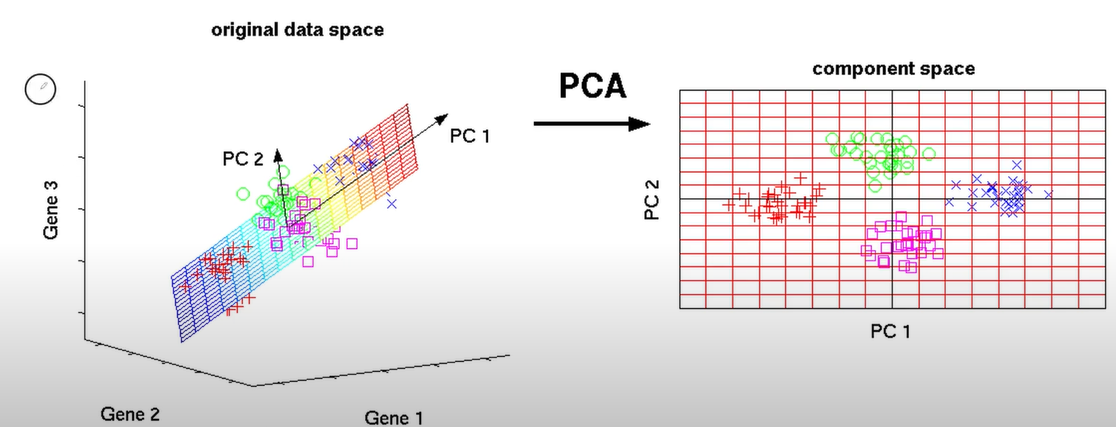

### Uygulama

In [60]:
df = pd.read_csv("datasets/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [61]:
# Salary bağımlı değişkenimizi ve Object tipteki değişkenleri atıyoruz.
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

df = df[num_cols]

# Eksik değerleri atıyoruz.
df.dropna(inplace=True)
df.shape

(322, 16)

In [62]:
# Standartlaştırma

df = StandardScaler().fit_transform(df)

# Modelleme

pca = PCA()
pca_fit = pca.fit_transform(df)

# Değişkenlerin başarılarını açıkladıkları varyans üzerinden değerlendiririz.

pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [64]:
# Kümülatif varyansları hesaplatalım.

np.cumsum(pca.explained_variance_ratio_)
# Sonucu incelediğimizde bir noktan sonra 0.99'da sabit kalıyor. 
# Yani o noktadan sonra gelen değişkenin model üzerinde çok bir etkisi olmadığını söyleyebiliriz.

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

* **NOT:**  
>  * Sonucu incelediğimizde bir noktan sonra 0.99'da sabit kalıyor. 
> * Yani o noktadan sonra gelen değişkenin model üzerinde çok bir etkisi olmadığını söyleyebiliriz.

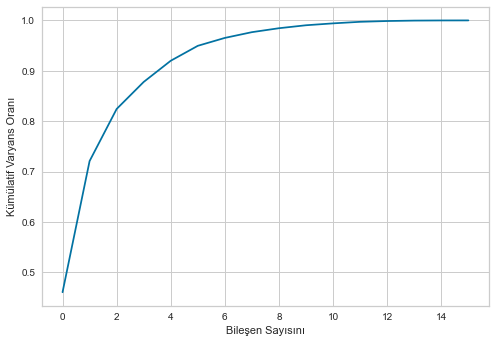

In [65]:
# Kaç değişken seçeceğimize karar vermek için elbow yöntemi kullanalım.

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

* **NOT:** 
> * Grafik incelendiğinde dirsek noktalarının 2 veya 3 gibi  olduğunu görüyoruz. 
> * Bileşen sayısı olarak bu değerler tercih edilebilir. 
> * Bu grafik sadece fikir vermesi için oluşturuluyor. Seçeceğimiz değer probleme göre değişiklik gösterebilir.

In [67]:
# Bileşen sayısı 3 seçelim. Final Modelini oluşturalım.

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)
# pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_) # 3 değişken modelin %82'sini açıklıyor.

array([0.46037855, 0.72077704, 0.82416565])

## Temel Bileşen Regresyon Modeli (PCR)

In [68]:
df = pd.read_csv("datasets/Hitters.csv")
df.shape

(322, 20)

In [69]:
# Salary bağımlı değişkenimizi ve Object tipteki değişkenleri atıyoruz.
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

others = [col for col in df.columns if col not in num_cols] # num_cols dışında kalan değişkenler

pd.DataFrame(pca_fit, columns=["PC1", "PC2", "PC3"]).head() # Final modelinde 3 değişkene indirdiğimiz değişkenler

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [71]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


* PCA ile elde ettiğimiz 3 değişken bizim 16 değişkenimizin taşıdığı bilginin %82'sini kapsıyor.
* Elde ettiğimiz bu değerleri ayırdığımız kategorik değişkenler ve "Salary" bağımlı değişkenimiz ile birleştirerek bir ML modeli kuracağız.


In [72]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1", "PC2", "PC3"]), df[others]], axis=1)
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [78]:
# Modelleme

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

final_df = pd.get_dummies(final_df, drop_first=True) # Nominal Kategorik değişkenleri dönüştürüyoruz. (LabelEncoding)
final_df.head()

# Eksik Verilerden kurtulalım.
final_df.dropna(inplace=True)

In [81]:
y = final_df.Salary
X = final_df.drop(["Salary"], axis=1)

lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))

rmse.mean() # 3 Değişkene indirgenmiş halde bile fena bir skor değil.

345.60211063519677

In [85]:
# DecisionTree ile modelleme

cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))

print(f"RMSE:{rmse}")

# Hyperparameter Optimization

from sklearn.model_selection import GridSearchCV

cart_params = {"max_depth": range(1, 11),
              "min_samples_split": range(2, 20)}

cart_best_grid = GridSearchCV(cart, cart_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
cart_best_grid.best_params_

RMSE:395.8674717742234
Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'max_depth': 3, 'min_samples_split': 19}

In [88]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))

rmse

330.1964109339104

--- 

Elimizde labelları olmayan bir veriye classification metodları uygulayabilir miyiz? 

> * Elimizdeki veride unsupervised learning yöntemleri ile kümeler elde ettikten sonra bu kümeleri label olarak kullanarak classification modelleri uygulanabilir. 

---

## PCA Görselleştirme

* PCA ile çok boyutlu veriyi 2 boyutta görselleştirme işlemleri.

In [89]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

### Önemli Fonksiyonlar

* Bu fonksiyonlar ihtiyaca ve probleme göre modifiye edilmelidir.

In [ ]:
# Bağımsız değişkenleri 2 boyuta indirgeyip, bağımlı değişken ile birleştirip yeni bir df oluşturuyoruz.

def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=["PC1", "PC2"])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

In [ ]:
import random

def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

### Breast Dataset

In [90]:
df = pd.read_csv("datasets/breast_cancer.csv")

y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

In [92]:

pca_df = create_pca_df(X, y) # Çok boyutlu X değişkenlerimizi 2 boyuta indirip, target ile birleştiriyor.
pca_df.head()

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


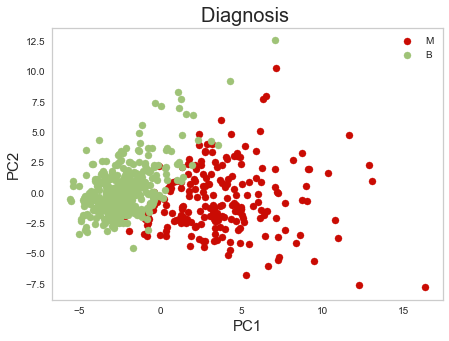

In [94]:
plot_pca(pca_df, "diagnosis")

* Çok boyutlu verimiz 2'ye indirgendi ve görselleştirildi.

### Iris Dataset

In [96]:
import seaborn as sns
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [97]:
y = df["species"]
X = df.drop(["species"], axis=1)

pca_df = create_pca_df(X, y)
pca_df.head()

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


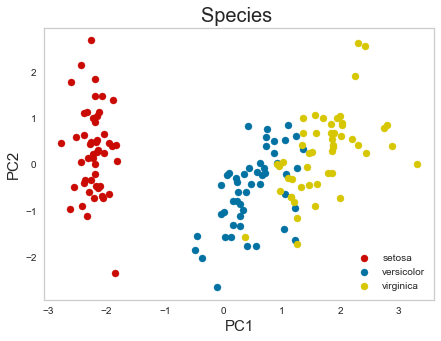

In [99]:
plot_pca(pca_df, "species")

### Diabetes Dataset

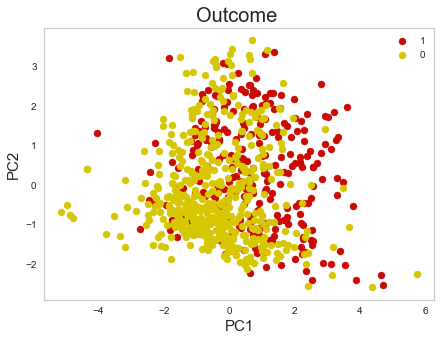

In [100]:
df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")

# Machine Learning Pipeline

In [101]:
import joblib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# !pip install catboost
# !pip install lightgbm
# !pip install xgboost

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

## Keşifçi Veri Analizi (EDA)

In [102]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [103]:
df = pd.read_csv("datasets/diabetes.csv")

check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1

In [104]:
# Değişken türlerinin ayrıştırılması

cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)
print(f"Kategorik değişkenler {cat_cols}")
print(f"Nümerik değişkenler {num_cols}")
print(f"Kardinal değişkenler {cat_but_car}")

Kategorik değişkenler ['Outcome']
Nümerik değişkenler ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Kardinal değişkenler []


In [105]:
# Kategorik değişkenlerin özeti

for col in cat_cols:
    cat_summary(df, col)

   Outcome      Ratio
0      500  65.104167
1      268  34.895833
##########################################


In [106]:
# Sayısa değişkenlerin özeti

df[num_cols].describe().T
# Hızlı bir bakış attığımızda Insulin değişkeninde bir anormallik var gibi.

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: Pregnancies, dtype: float64


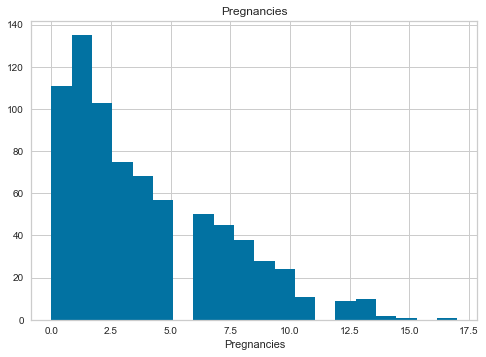

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: Glucose, dtype: float64


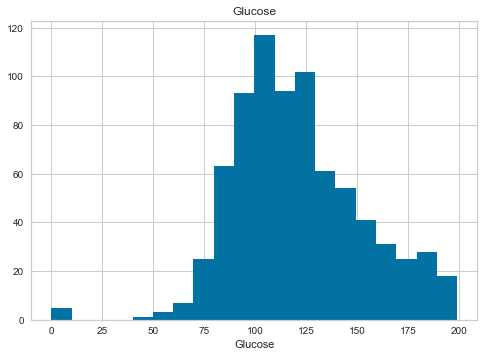

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       90.000000
99%      106.000000
max      122.000000
Name: BloodPressure, dtype: float64


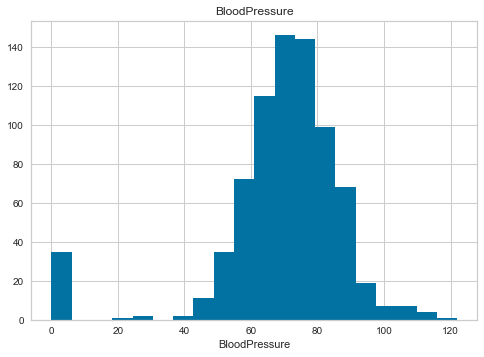

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        8.200000
40%       18.000000
50%       23.000000
60%       27.000000
70%       31.000000
80%       35.000000
90%       40.000000
95%       44.000000
99%       51.330000
max       99.000000
Name: SkinThickness, dtype: float64


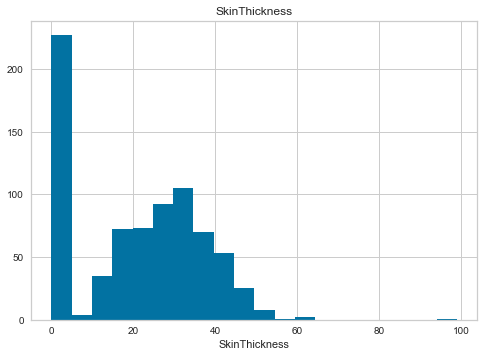

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%       30.500000
60%       72.200000
70%      106.000000
80%      150.000000
90%      210.000000
95%      293.000000
99%      519.900000
max      846.000000
Name: Insulin, dtype: float64


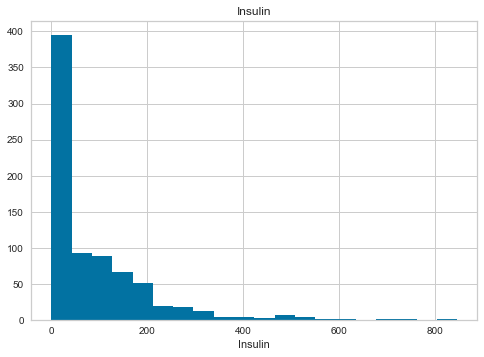

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
5%        21.800000
10%       23.600000
20%       25.900000
30%       28.200000
40%       30.100000
50%       32.000000
60%       33.700000
70%       35.490000
80%       37.800000
90%       41.500000
95%       44.395000
99%       50.759000
max       67.100000
Name: BMI, dtype: float64


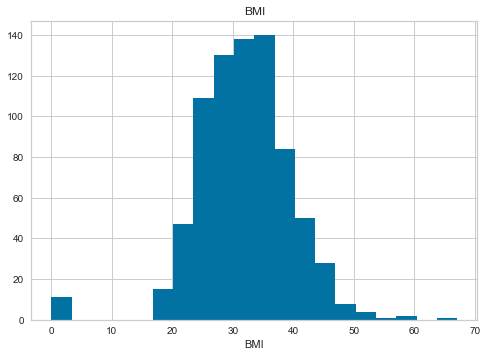

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


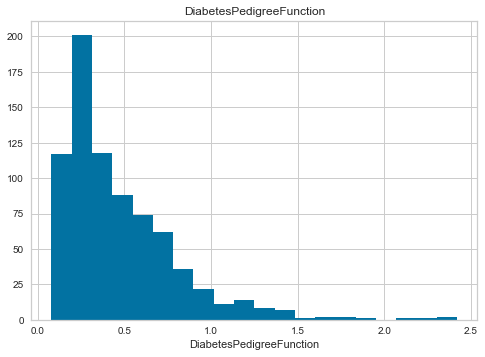

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
max       81.000000
Name: Age, dtype: float64


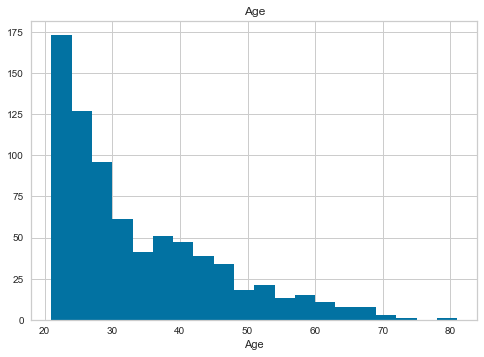

In [107]:
# Sayısal değişkenlerin incelenmesi

for col in num_cols:
    num_summary(df, col, plot=True)

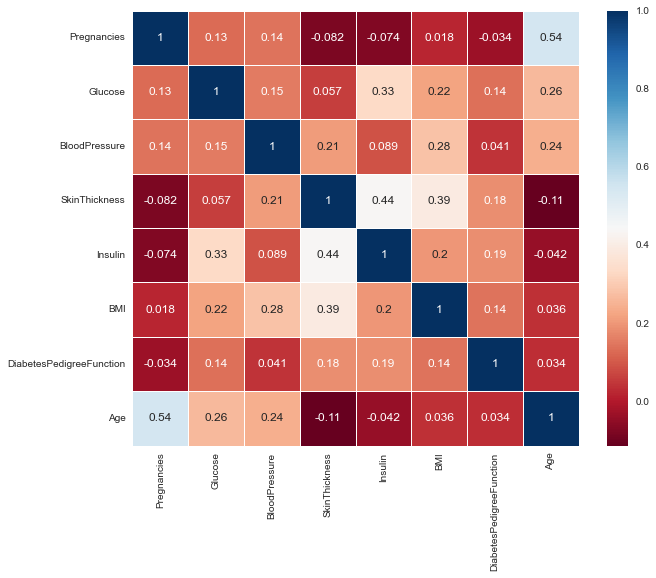

In [108]:
# Sayısal değişkenlerin birbirleri ile korelasyonu

correlation_matrix(df, num_cols)

In [109]:
# Target ile sayısal değişkenlerin incelenmesi

for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        109.980000
1        141.257463


         BloodPressure
Outcome               
0            68.184000
1            70.824627


         SkinThickness
Outcome               
0            19.664000
1            22.164179


            Insulin
Outcome            
0         68.792000
1        100.335821


               BMI
Outcome           
0        30.304200
1        35.142537


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164




## Veri Ön İşleme (Data Preprocessing)

In [145]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [146]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT_OLD,NEW_AGE_CAT_YOUNG,NEW_GLUCOSE_CAT_PREDIABETES,NEW_BMI_RANGE_HEALTY,NEW_BMI_RANGE_OVERWEIGHT,NEW_BMI_RANGE_OBESE,NEW_BLOODPRESSURE_HS1,NEW_BLOODPRESSURE_HS2,NEW_GLUCOSE_CAT,NEW_AGE_CAT,NEW_BMI_RANGE,NEW_BLOODPRESSURE
0,6,148,72,35,0,33.6,0.627,50,1,0,0,1,0,0,1,0,0,prediabetes,middleage,obese,normal
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0,0,1,0,0,0,normal,young,overweight,normal
2,8,183,64,0,0,23.3,0.672,32,1,0,1,1,1,0,0,0,0,prediabetes,young,healty,normal
3,1,89,66,23,94,28.1,0.167,21,0,0,1,0,0,1,0,0,0,normal,young,overweight,normal
4,0,137,40,35,168,43.1,2.288,33,1,0,1,0,0,0,1,0,0,normal,young,obese,normal


In [147]:
# Değişken isimlerini büyütmek

df.columns = [col.upper() for col in df.columns]

In [148]:
# Feature Engineering

# Glucose
df['NEW_GLUCOSE_CAT'] = pd.cut(x=df['GLUCOSE'], bins=[-1, 139, 200], labels=["normal", "prediabetes"])

# Age
df.loc[(df['AGE'] < 35), "NEW_AGE_CAT"] = 'young'
df.loc[(df['AGE'] >= 35) & (df['AGE'] <= 55), "NEW_AGE_CAT"] = 'middleage'
df.loc[(df['AGE'] > 55), "NEW_AGE_CAT"] = 'old'


# BMI
df['NEW_BMI_RANGE'] = pd.cut(x=df['BMI'], bins=[-1, 18.5, 24.9, 29.9, 100],
                             labels=["underweight", "healty", "overweight", "obese"])

# BloodPressure
df['NEW_BLOODPRESSURE'] = pd.cut(x=df['BLOODPRESSURE'], bins=[-1, 79, 89, 123], labels=["normal", "hs1", "hs2"])

In [149]:
# Yeni değişkenler ürettik. Tekrar grab_col_names çağırmalıyız.

cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)
print(f"Kategorik değişkenler {cat_cols}")
print(f"Nümerik değişkenler {num_cols}")
print(f"Kardinal değişkenler {cat_but_car}")

Kategorik değişkenler ['NEW_AGE_CAT', 'OUTCOME', 'NEW_AGE_CAT_OLD', 'NEW_AGE_CAT_YOUNG', 'NEW_GLUCOSE_CAT_PREDIABETES', 'NEW_BMI_RANGE_HEALTY', 'NEW_BMI_RANGE_OVERWEIGHT', 'NEW_BMI_RANGE_OBESE', 'NEW_BLOODPRESSURE_HS1', 'NEW_BLOODPRESSURE_HS2', 'NEW_GLUCOSE_CAT', 'NEW_BMI_RANGE', 'NEW_BLOODPRESSURE']
Nümerik değişkenler ['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE']
Kardinal değişkenler []


In [150]:
# Kategorik değişkenlerin özeti

for col in cat_cols:
    cat_summary(df, col)

           NEW_AGE_CAT      Ratio
young              488  63.541667
middleage          230  29.947917
old                 50   6.510417
##########################################
   OUTCOME      Ratio
0      500  65.104167
1      268  34.895833
##########################################
   NEW_AGE_CAT_OLD      Ratio
0              718  93.489583
1               50   6.510417
##########################################
   NEW_AGE_CAT_YOUNG      Ratio
1                488  63.541667
0                280  36.458333
##########################################
   NEW_GLUCOSE_CAT_PREDIABETES      Ratio
0                          571  74.348958
1                          197  25.651042
##########################################
   NEW_BMI_RANGE_HEALTY     Ratio
0                   666  86.71875
1                   102  13.28125
##########################################
   NEW_BMI_RANGE_OVERWEIGHT      Ratio
0                       589  76.692708
1                       179  23.307292
#########

In [151]:
# Bağımlı değişken ile yeni değişkenlerin ilişkisi nasıl?


cat_cols = [col for col in cat_cols if "OUTCOME" not in col] # OUTCOME bağımlı değişkenimiz.

for col in cat_cols:
    target_summary_with_cat(df, "OUTCOME", col)



             TARGET_MEAN
NEW_AGE_CAT             
middleage       0.543478
old             0.340000
young           0.258197


                 TARGET_MEAN
NEW_AGE_CAT_OLD             
0                   0.349582
1                   0.340000


                   TARGET_MEAN
NEW_AGE_CAT_YOUNG             
0                     0.507143
1                     0.258197


                             TARGET_MEAN
NEW_GLUCOSE_CAT_PREDIABETES             
0                               0.232925
1                               0.685279


                      TARGET_MEAN
NEW_BMI_RANGE_HEALTY             
0                        0.391892
1                        0.068627


                          TARGET_MEAN
NEW_BMI_RANGE_OVERWEIGHT             
0                            0.387097
1                            0.223464


                     TARGET_MEAN
NEW_BMI_RANGE_OBESE             
0                       0.165541
1                       0.463983


                       TARGET_MEAN
NE

In [152]:
# Oluşturduğumuz tüm kategorik değişkenlere OHE uyguluyoruz.

df = one_hot_encoder(df, cat_cols, drop_first=True)
check_df(df)

##################### Shape #####################
(768, 25)
##################### Types #####################
PREGNANCIES                        int64
GLUCOSE                            int64
BLOODPRESSURE                      int64
SKINTHICKNESS                      int64
INSULIN                            int64
BMI                              float64
DIABETESPEDIGREEFUNCTION         float64
AGE                                int64
OUTCOME                            int64
NEW_AGE_CAT_old                    uint8
NEW_AGE_CAT_young                  uint8
NEW_AGE_CAT_OLD_1                  uint8
NEW_AGE_CAT_YOUNG_1                uint8
NEW_GLUCOSE_CAT_PREDIABETES_1      uint8
NEW_BMI_RANGE_HEALTY_1             uint8
NEW_BMI_RANGE_OVERWEIGHT_1         uint8
NEW_BMI_RANGE_OBESE_1              uint8
NEW_BLOODPRESSURE_HS1_1            uint8
NEW_BLOODPRESSURE_HS2_1            uint8
NEW_GLUCOSE_CAT_prediabetes        uint8
NEW_BMI_RANGE_healty               uint8
NEW_BMI_RANGE_overweight     

In [155]:
tempList = [col for col in df.columns if col.startswith("NEW_")]
df[tempList] = df[tempList].astype("int64")

In [158]:
# Son güncel değişken türlerini tutuyorum.

cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)
cat_cols = [col for col in cat_cols if "OUTCOME" not in col]
cat_cols

['NEW_AGE_CAT_old',
 'NEW_AGE_CAT_young',
 'NEW_AGE_CAT_OLD_1',
 'NEW_AGE_CAT_YOUNG_1',
 'NEW_GLUCOSE_CAT_PREDIABETES_1',
 'NEW_BMI_RANGE_HEALTY_1',
 'NEW_BMI_RANGE_OVERWEIGHT_1',
 'NEW_BMI_RANGE_OBESE_1',
 'NEW_BLOODPRESSURE_HS1_1',
 'NEW_BLOODPRESSURE_HS2_1',
 'NEW_GLUCOSE_CAT_prediabetes',
 'NEW_BMI_RANGE_healty',
 'NEW_BMI_RANGE_overweight',
 'NEW_BMI_RANGE_obese',
 'NEW_BLOODPRESSURE_hs1',
 'NEW_BLOODPRESSURE_hs2']

In [159]:
# Nümerik değişkenlerde outlier var mı?
for col in num_cols:
    print(col, check_outlier(df, col, 0.05, 0.95))

# INSULIN değişkeni dışında outlier içeren değişkenimiz yok.

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN True
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False


In [161]:
# INSULIN değişkenindeki outliersları baskılama yöntemi ile dolduracağız.

replace_with_thresholds(df, "INSULIN")

for col in num_cols:
    print(col, check_outlier(df, col, 0.05, 0.95))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN False
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False


In [163]:
# Standartlaştırma

X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT_old,NEW_AGE_CAT_young,NEW_AGE_CAT_OLD_1,NEW_AGE_CAT_YOUNG_1,NEW_GLUCOSE_CAT_PREDIABETES_1,NEW_BMI_RANGE_HEALTY_1,NEW_BMI_RANGE_OVERWEIGHT_1,NEW_BMI_RANGE_OBESE_1,NEW_BLOODPRESSURE_HS1_1,NEW_BLOODPRESSURE_HS2_1,NEW_GLUCOSE_CAT_prediabetes,NEW_BMI_RANGE_healty,NEW_BMI_RANGE_overweight,NEW_BMI_RANGE_obese,NEW_BLOODPRESSURE_hs1,NEW_BLOODPRESSURE_hs2
0,0.639947,0.848324,0.149641,0.907270,-0.787602,0.204013,0.468492,1.425995,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.787602,-0.684422,-0.365061,-0.190672,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.787602,-1.103255,0.604397,-0.105584,1,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0
3,-0.844885,-0.998208,-0.160546,0.154533,0.217583,-0.494043,-0.920763,-1.041549,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,-1.141852,0.504055,-1.504687,0.907270,1.008900,1.409746,5.484909,-0.020496,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Bağımlı ve Bağımsız değişkenleri ayırıyoruz.

y = df["OUTCOME"]
X = df.drop(["OUTCOME"], axis=1)


In [164]:
# Tüm yaptığımız işlemleri tek fonksiyon içerisine atama

def diabetes_data_prep(dataframe):
    dataframe.columns = [col.upper() for col in dataframe.columns]

    # Glucose
    dataframe['NEW_GLUCOSE_CAT'] = pd.cut(x=dataframe['GLUCOSE'], bins=[-1, 139, 200], labels=["normal", "prediabetes"])

    # Age
    dataframe.loc[(dataframe['AGE'] < 35), "NEW_AGE_CAT"] = 'young'
    dataframe.loc[(dataframe['AGE'] >= 35) & (dataframe['AGE'] <= 55), "NEW_AGE_CAT"] = 'middleage'
    dataframe.loc[(dataframe['AGE'] > 55), "NEW_AGE_CAT"] = 'old'

    # BMI
    dataframe['NEW_BMI_RANGE'] = pd.cut(x=dataframe['BMI'], bins=[-1, 18.5, 24.9, 29.9, 100],
                                        labels=["underweight", "healty", "overweight", "obese"])

    # BloodPressure
    dataframe['NEW_BLOODPRESSURE'] = pd.cut(x=dataframe['BLOODPRESSURE'], bins=[-1, 79, 89, 123],
                                            labels=["normal", "hs1", "hs2"])

    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe, cat_th=5, car_th=20)

    cat_cols = [col for col in cat_cols if "OUTCOME" not in col]

    df = one_hot_encoder(dataframe, cat_cols, drop_first=True)

    df.columns = [col.upper() for col in df.columns]

    cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

    cat_cols = [col for col in cat_cols if "OUTCOME" not in col]

    replace_with_thresholds(df, "INSULIN")

    X_scaled = StandardScaler().fit_transform(df[num_cols])
    df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

    y = df["OUTCOME"]
    X = df.drop(["OUTCOME"], axis=1)

    return X, y

In [166]:
X, y = diabetes_data_prep(df)

## Base Models

In [167]:
# Tanımladığımız temel modelleri cross_validate ile veriye uygulayıp girdiğimiz metriğin başarısını döndürüyor.
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   # ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")
    
base_models(X, y, scoring="accuracy")

Base Models....
accuracy: 0.7643 (LR) 
accuracy: 0.7734 (KNN) 
accuracy: 0.7682 (SVC) 
accuracy: 0.6862 (CART) 
accuracy: 0.7852 (RF) 
accuracy: 0.7578 (Adaboost) 
accuracy: 0.7526 (GBM) 
accuracy: 0.7448 (XGBoost) 
accuracy: 0.7383 (LightGBM) 


## Automated Hyperparameter Optimization

In [168]:
# Modellerimiz için parametre havuzları oluşturuyoruz.
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500]}

# Modelleri tutuyoruz.
classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]


def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## KNN ##########
roc_auc (Before): 0.789
roc_auc (After): 0.8023
KNN best params: {'n_neighbors': 8}

########## CART ##########
roc_auc (Before): 0.6575
roc_auc (After): 0.7943
CART best params: {'max_depth': 6, 'min_samples_split': 23}

########## RF ##########
roc_auc (Before): 0.8261
roc_auc (After): 0.836
RF best params: {'max_depth': 15, 'max_features': 5, 'min_samples_split': 15, 'n_estimators': 200}

########## XGBoost ##########
roc_auc (Before): 0.8015
roc_auc (After): 0.8179
XGBoost best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

########## LightGBM ##########
roc_auc (Before): 0.807
roc_auc (After): 0.8185
LightGBM best params: {'learning_rate': 0.01, 'n_estimators': 300}



In [173]:
best_models

{'KNN': KNeighborsClassifier(n_neighbors=8),
 'CART': DecisionTreeClassifier(max_depth=6, min_samples_split=23),
 'RF': RandomForestClassifier(max_depth=15, max_features=5, min_samples_split=15,
                        n_estimators=200),
 'XGBoost': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, eval_metric='logloss', gamma=None,
               gpu_id=None, importance_type=None, interaction_constraints=None,
               learning_rate=0.01, max_delta_step=None, max_depth=5,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, reg_alpha=None,
               reg_lambda=None, scale_pos_weight=None, subsample=None,
               tree_method=None, use_label_encoder=False,
               validate_parameters=None, verbosity=N

## Stacking & Ensemble Learning

* Temeli birden fazla modeli bir arada kullanmaya dayanır.

In [174]:
# En iyi 3 modelimizin güçlerini birleştirmiş hali ile sonuçlarımızı görelim.

def voting_classifier(best_models, X, y):
    print("Voting Classifier...")
    
    #best_models içerisinden hyperparametre halleri ile birlikte modelleri çağırıyor.
    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)

    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

voting_clf = voting_classifier(best_models, X, y)

Voting Classifier...
Accuracy: 0.7708333333333334
F1Score: 0.6354330668346044
ROC_AUC: 0.8328911090173188


## New Observation

In [176]:
# Bir gözlem üzerinde voting_clf modelimizin başarısına bakacağız.

random_user = X.sample(1, random_state=45)
voting_clf.predict(random_user) # Bu veriyi "1" olarak tahminledi.

array([1], dtype=int64)

In [177]:
# Modeli kaydetme

joblib.dump(voting_clf, "voting_clf.pkl")

['voting_clf.pkl']

In [179]:
# Modeli yükleme

new_model = joblib.load("voting_clf.pkl")
new_model.predict(random_user)

array([1], dtype=int64)

## Prediction

In [180]:
import joblib
import pandas as pd

In [ ]:
df = pd.read_csv("datasets/diabetes.csv")


# yeni gelen hastamız bu olsun
random_user = df.sample(1, random_state=45)

# Model çağırma
new_model = joblib.load("voting_clf.pkl")

#new_model.predict(random_user)

**NOT:** 

> * "new_model.predict(random_user)" kullanımı hata döndürecektir. Çünkü biz ham verimiz üzerinde çeşitli feature engineering işlemleri yapmıştık. Bu yüzden yeni gelen bir veriyi modele bu halde sokarsak boyut hatası alırız. 


---  

* "Pipeline.ipynb" dosyasını bu dosyaya dahil etmek için; 

>> 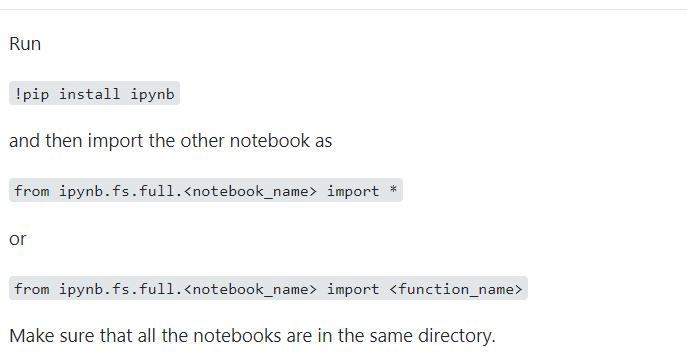

>>>> *Importing an ipynb file from another ipynb file [stackoverflow](https://stackoverflow.com/questions/20186344/importing-an-ipynb-file-from-another-ipynb-file).* 

---

In [184]:
from ipynb.fs.full.Pipeline import diabetes_data_prep

In [187]:
# Bunları yeni veri kabul edelim.
X, y = diabetes_data_prep(df)

# Hazır olan modelimize bir kaynaktan yeni bir veri geldiğini kabul ediyoruz.
random_user = X.sample(1, random_state=45)
new_model = joblib.load("voting_clf.pkl")

new_model.predict(random_user) # Hata almadık ve yeni gözlemimizin model çıktısını elde ettik.

array([1], dtype=int64)